In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import pandas as pd
from REMclust import REM

### Example 1
The Reinforced EM algorithm is applied to identify pulsar candidates from the High Time Resolution Universe Survey (HTRU2) dataset: https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2. Pulsars are highly magnetized rotating neutron stars that emit regular pulses of radiation. The HTRU2 dataset was developed to identify these pulsar candidates from other radiation sources. Each data point in the HTRU2 dataset is described by 8 variables/features, namely mean, standard deviation, the measure of flatness, and asymmetry of the radiation profile, along with mean, standard deviation, the measure of flatness, and asymmetry of the signal-to-noise ratio as a function of dispersion measure (DM-SNR). The target variable is the binary class indicating pulsar candidate.

##### Load glass dataset

In [2]:
df = pd.read_csv('Data/HTRU_2.csv')

X = df[df.columns[:-1]]    
X = np.array(X)

##### Standardize the dataset for fair analysis

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
n_samples, n_features = X_scaled.shape

##### Applying REM algorithm

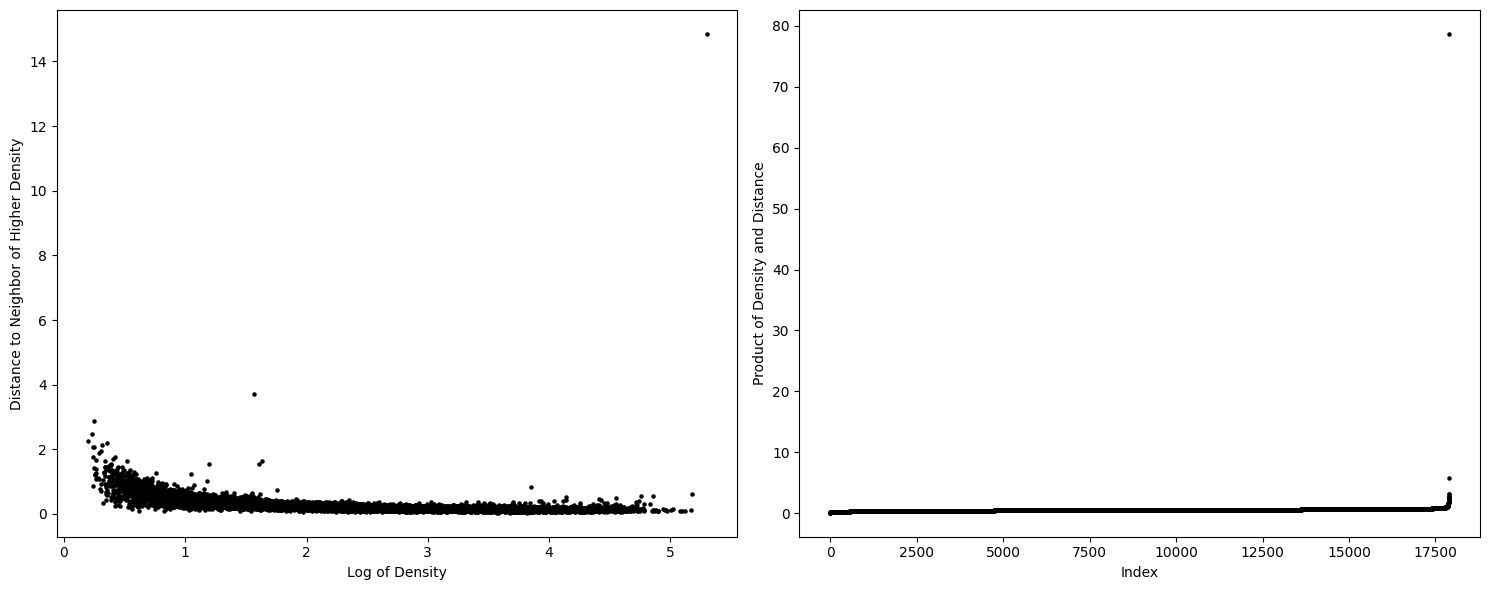

In [4]:
bndwk = int(np.floor(np.min((30, np.sqrt(n_samples)))))
Cluster = REM(data=X_scaled, covariance_type = "full", criteria = "all", bandwidth = bndwk, tol = 1e-3)
Cluster.mode_decision_plot()

In [7]:
# Setting the density threshold and distance threshold value from the mode decision plot 
Cluster.fit(density_threshold = 1.0, distance_threshold = 3.5)
yp = Cluster.get_labels(mixture_selection='aic')

2 modes selected.


C:\Users\samue\anaconda3\envs\sisa\lib\site-packages\REMclust\REM.py:432: ComplexWarning: Casting complex values to real discards the imaginary part
  covariances_jitter[i, :, :] = vec.dot(np.diag(val)).dot(np.linalg.inv(vec))


##### Plotting the classified dataset

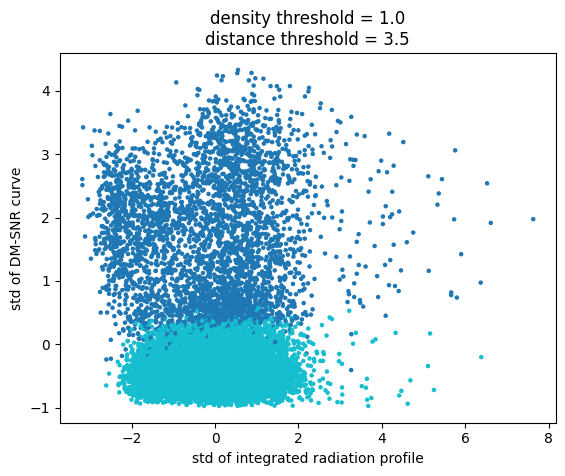

In [9]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 5], s = 5, c = yp, marker = "o", cmap='tab10')
plt.xlabel('std of integrated radiation profile')
plt.ylabel('std of DM-SNR curve')
plt.title('density threshold = 1.0' + '\n' + 'distance threshold = 3.5')
plt.show()

### Example 2
Now, the Reinforced EM algorithm is applied to the Palmer Archipelago (Antarctica) Penguin Dataset: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data. The dataset is used to study three species of penguins: Adelie Penguins (Pygoscelis adeliae), Gentoo Penguins (Pygoscelis papua), and Chinstrap Penguins (Pygoscelis antarctica). Each data point in the Penguin dataset is described by 4 variables/features, namely; the length and depth of the upper ridge of a penguin's beak (mm), flipper length (mm), and body mass (g). The target variable is the species class, which includes the three aforementioned species of penguins.

##### Load glass dataset

In [17]:
df = pd.read_csv('Data/penguins_size.csv')

df['species'] = df['species'].map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
df['island'] = df['island'].map({'Torgersen':0, 'Biscoe':1, 'Dream':2})
df['sex'] = df['sex'].map({'MALE':0, 'FEMALE':1})

df = df.dropna()

X = df[df.columns[2:-1]]    
X = np.array(X)

##### Standardize the dataset for fair analysis

In [18]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
n_samples, n_features = X_scaled.shape

##### Applying REM algorithm

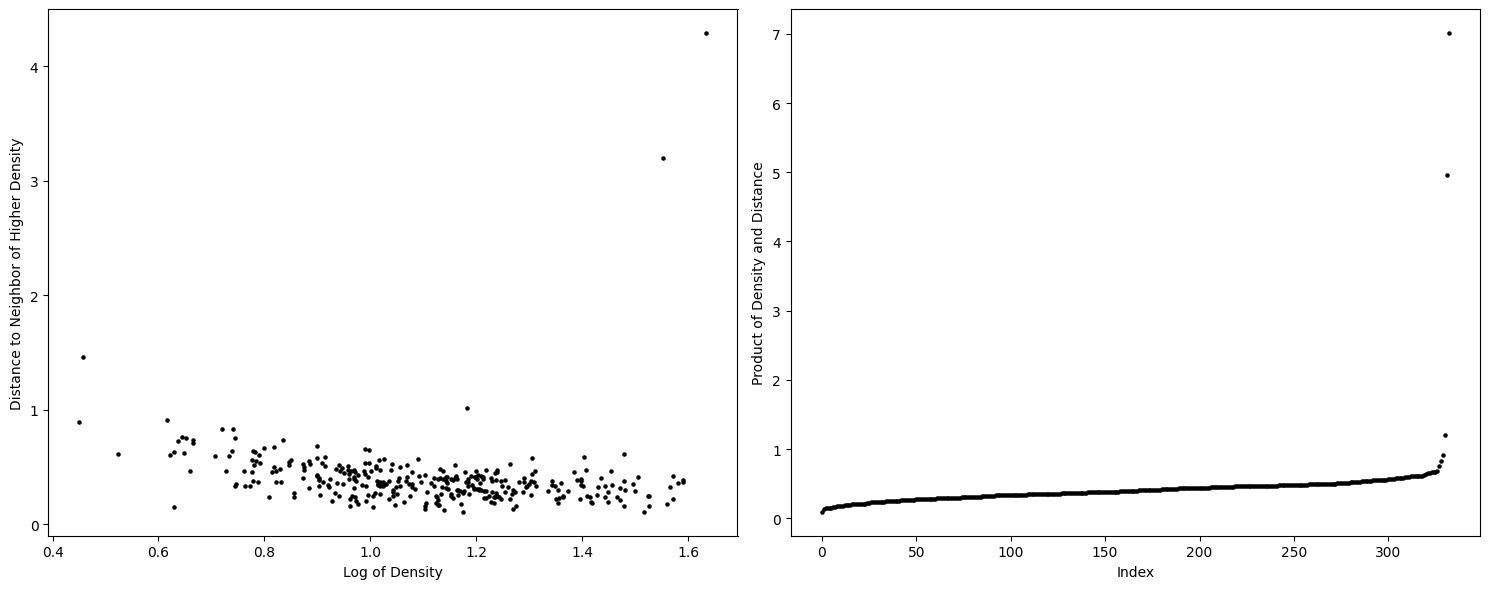

In [19]:
bndwk = int(np.floor(np.min((30, np.square(n_samples)))))
Cluster = REM(data=X_scaled, covariance_type = "full", criteria = "all", bandwidth = bndwk, tol = 1e-3)
Cluster.mode_decision_plot()

In [20]:
# Setting the density threshold and distance threshold value from the mode decision plot 
Cluster.fit(density_threshold = 1.0, distance_threshold = 1.0)
yp = Cluster.get_labels(mixture_selection='aic')

3 modes selected.


##### Plotting the classified dataset

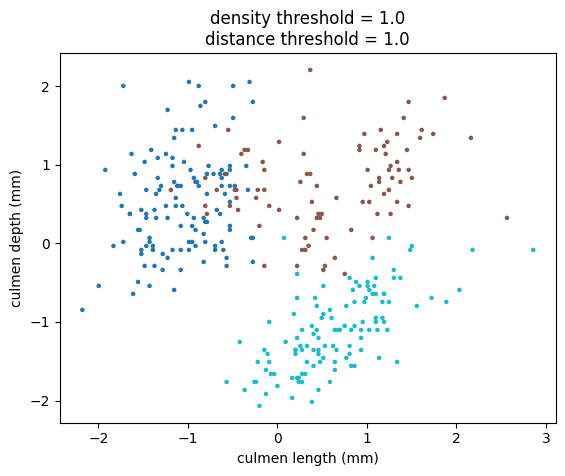

In [21]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s = 5, c = yp, marker = "o", cmap='tab10')
plt.xlabel('culmen length (mm)')
plt.ylabel('culmen depth (mm)')
plt.title('density threshold = 1.0' + '\n' + 'distance threshold = 1.0')
plt.show()

### Sensitivity analysis

In [22]:
# NMI & ARI
nmi = metrics.normalized_mutual_info_score(df['species'].astype(int), yp.astype(int))
ari = metrics.adjusted_rand_score(df['species'].astype(int), yp.astype(int))
print("Adjusted Rand Score: \t", ari)
print("Normalized Mutual Information Score: \t", nmi)

Adjusted Rand Score: 	 0.7740574481288712
Normalized Mutual Information Score: 	 0.7785511759363766


3 modes selected.
3 modes selected.
3 modes selected.
2 modes selected.
2 modes selected.


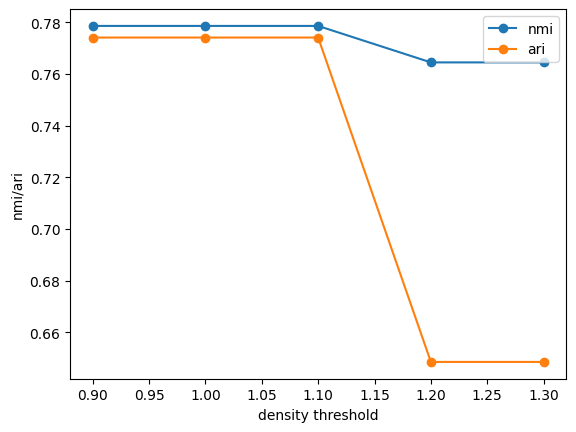

In [24]:
# sensitivity w.r.t density threshold
n = 5
nmi_x = np.zeros((n))
ari_x = np.zeros((n))
dens_thres = [0.90,1.00,1.10,1.20,1.30]

for i in range(n):
    Cluster.fit(density_threshold = dens_thres[i], 
                distance_threshold = 1.0)
    yp_x = Cluster.get_labels(mixture_selection='aic')
    nmi_x[i] = metrics.normalized_mutual_info_score(df['species'].astype(int), yp_x.astype(int))
    ari_x[i] = metrics.adjusted_rand_score(df['species'].astype(int), yp_x.astype(int))

plt.plot(dens_thres, nmi_x, marker = 'o', label='nmi')
plt.plot(dens_thres, ari_x, marker = 'o', label='ari')
plt.xlabel('density threshold')
plt.ylabel('nmi/ari')
plt.legend()
plt.show()

3 modes selected.
3 modes selected.
3 modes selected.
2 modes selected.
2 modes selected.


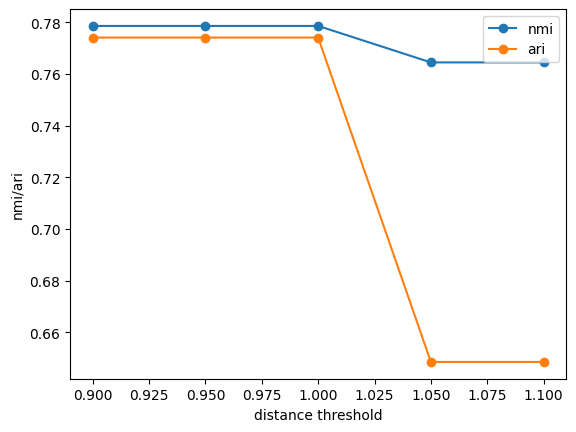

In [26]:
# sensitivity w.r.t distance threshold
n = 5
nmi_x = np.zeros((n))
ari_x = np.zeros((n))
dist_thres = [0.90,0.95,1.00,1.05,1.10]

for i in range(n):
    Cluster.fit(density_threshold = 1.0, 
                distance_threshold = dist_thres[i])
    yp_x = Cluster.get_labels(mixture_selection='aic')
    nmi_x[i] = metrics.normalized_mutual_info_score(df['species'].astype(int), yp_x.astype(int))
    ari_x[i] = metrics.adjusted_rand_score(df['species'].astype(int), yp_x.astype(int))

plt.plot(dist_thres, nmi_x, marker = 'o', label='nmi')
plt.plot(dist_thres, ari_x, marker = 'o', label='ari')
plt.xlabel('distance threshold')
plt.ylabel('nmi/ari')
plt.legend()
plt.show()

### Conclusion
We can observe that the REM algorithm for cluster analysis using Gaussian Mixture Models (GMM) provides a way to estimate the parameters for initializing the GMM clustering. In example 1, the *mode_decision_plot()* displays the log of density against the distance to the neighbor of higher density, clearly depicting the density threshold as 1.0 and the distance threshold as 3.5. With the derived density and distance thresholds, the *REM()* function clusters the given dataset. Moreover, the threshold values from the *mode_decision_plot()* are once again validated and confirmed in the sensitivity analysis, where the performance metrics decrease beyond the derived threshold values.